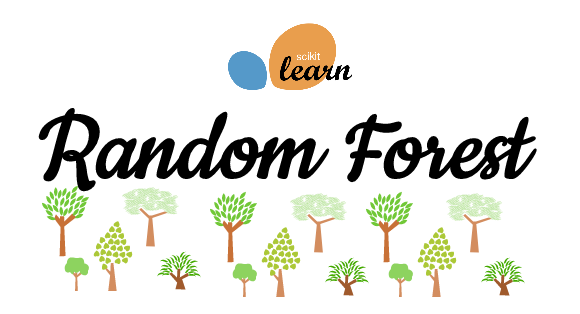

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for 
both Classification and Regression problems in ML. 
It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex 
problem and to improve the performance of the model.

"Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." 

Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.


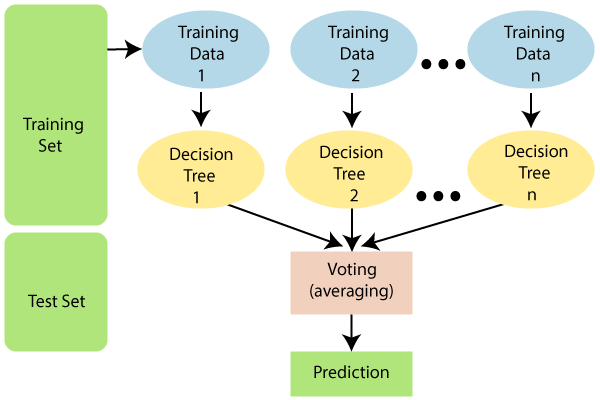

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


df=pd.read_csv("test.csv")
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [2]:

df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [3]:
mv=df['Age'].mean()
df['Age'].fillna(value=mv, inplace=True)


In [4]:
df['Cabin'].fillna(value='none', inplace=True)


In [5]:
df['Fare'].fillna(value=0, inplace=True)


In [6]:
df['Age']=round(df['Age'],2)


In [7]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [9]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272057,0.447368,0.392344,35.541956
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.867684
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.270000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
df.shape

(418, 11)

In [11]:
col_names = ['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
for col in col_names:
    print(df[col].value_counts())  

892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: PassengerId, Length: 418, dtype: int64
3    218
1    107
2     93
Name: Pclass, dtype: int64
Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helena    1
Touma, Miss. Maria Youssef     1
                              ..
Zakarian, Mr. Mapriededer      1
Carlsson, Mr. Carl Robert      1
Dintcheff, Mr. Valtcho         1
Thomas, Mr. Charles P          1
Peter, Master. Michael J       1
Name: Name, Length: 418, dtype: int64
male      266
female    152
Name: Sex, dtype: int64
30.27    86
24.00    17
21.00    17
22.00    16
30.00    15
         ..
76.00     1
28.50     1
22.50     1
62.00     1
38.50     1
Name: Age, Length: 80, dtype: int64
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Par

In [12]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,none,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,none,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,none,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,none,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,none,S


In [13]:
# convert categorical values to numerical values by using the "OrdinalEncoder" function provided by the sklearn package 
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["Name"] = ord_enc.fit_transform(df[["Name"]])
df["Sex"] = ord_enc.fit_transform(df[["Sex"]])
df["Ticket"] = ord_enc.fit_transform(df[["Ticket"]])
df["Cabin"] = ord_enc.fit_transform(df[["Cabin"]])
df["Embarked"] = ord_enc.fit_transform(df[["Embarked"]])

In [14]:
Features = df.iloc[:, 0:10].values
Labels = df.iloc[:,-1].values

In [15]:
Features

array([[ 892.    ,    3.    ,  206.    , ...,  152.    ,    7.8292,
          76.    ],
       [ 893.    ,    3.    ,  403.    , ...,  221.    ,    7.    ,
          76.    ],
       [ 894.    ,    2.    ,  269.    , ...,   73.    ,    9.6875,
          76.    ],
       ...,
       [1307.    ,    3.    ,  332.    , ...,  346.    ,    7.25  ,
          76.    ],
       [1308.    ,    3.    ,  384.    , ...,  220.    ,    8.05  ,
          76.    ],
       [1309.    ,    3.    ,  302.    , ...,  105.    ,   22.3583,
          76.    ]])

In [16]:
Labels

array([1., 2., 1., 2., 2., 2., 1., 2., 0., 2., 2., 2., 2., 2., 2., 0., 1.,
       0., 2., 0., 0., 2., 2., 0., 0., 2., 0., 0., 2., 0., 2., 2., 2., 2.,
       0., 0., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 1., 0., 2., 2.,
       0., 2., 2., 0., 1., 2., 2., 2., 0., 2., 2., 2., 1., 0., 2., 1., 2.,
       0., 2., 1., 2., 2., 0., 0., 0., 2., 2., 2., 1., 0., 2., 2., 2., 1.,
       0., 1., 2., 1., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2.,
       1., 2., 0., 2., 1., 1., 2., 2., 0., 1., 0., 1., 2., 0., 0., 2., 0.,
       2., 2., 1., 0., 2., 1., 2., 2., 1., 2., 2., 2., 0., 2., 0., 2., 2.,
       0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 0., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 1., 0., 2., 2., 2., 2., 0., 2., 0., 2.,
       2., 0., 2., 0., 2., 2., 2., 0., 2., 0., 2., 0., 2., 1., 0., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 2., 2., 0., 2., 2., 2., 1., 2., 0., 2.,
       2., 0., 1., 2., 0., 2., 2., 2., 2., 2., 2., 2., 1., 2., 0., 2., 0.,
       2., 2., 2., 0., 0.

In [17]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

for i in range(1,len(df.columns)-1):
    sele=SelectKBest(chi2,k=i)
    c=sele.fit_transform(Features,Labels)
print(c)

[[ 892.        3.      206.     ...  152.        7.8292   76.    ]
 [ 893.        3.      403.     ...  221.        7.       76.    ]
 [ 894.        2.      269.     ...   73.        9.6875   76.    ]
 ...
 [1307.        3.      332.     ...  346.        7.25     76.    ]
 [1308.        3.      384.     ...  220.        8.05     76.    ]
 [1309.        3.      302.     ...  105.       22.3583   76.    ]]


In [18]:
sk = SelectKBest(chi2, k=4)
Features_best = sk.fit_transform(Features, Labels)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Features_best, Labels) 

In [20]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [21]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
Lg = LogisticRegression()

In [22]:
### hard voting
vc = VotingClassifier(estimators=[("rf", rf), ("dt", dt), ("Lg", Lg)], voting="hard")

In [23]:
vc.fit(X_train, Y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('Lg', LogisticRegression())])

In [24]:
pred = vc.predict(X_test)
pred

array([2., 1., 2., 0., 2., 0., 2., 2., 0., 0., 2., 2., 2., 1., 1., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 0.,
       2., 0., 0., 2., 1., 2., 2., 1., 2., 2., 1., 0., 2., 2., 2., 2., 1.,
       2., 0., 2., 1., 2., 2., 0., 1., 2., 2., 2., 2., 2., 0., 0., 2., 0.,
       2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 0., 2., 0.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 0., 1., 2., 2., 2., 1., 0.,
       2., 1., 2.])

In [25]:
from sklearn.metrics import classification_report,accuracy_score
print("Accuracy:",accuracy_score(pred,Y_test))
print(classification_report(pred, Y_test))

Accuracy: 0.9238095238095239
              precision    recall  f1-score   support

         0.0       0.94      0.80      0.86        20
         1.0       0.82      1.00      0.90        14
         2.0       0.94      0.94      0.94        71

    accuracy                           0.92       105
   macro avg       0.90      0.91      0.90       105
weighted avg       0.93      0.92      0.92       105



In [26]:
### soft vvoting
vc_soft = VotingClassifier(estimators=[("rf", rf), ("dt", dt), ("Lg", Lg)], voting="soft", weights=[0.4, 0.3, 0.5])

In [27]:
vc_soft.fit(X_train, Y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('Lg', LogisticRegression())],
                 voting='soft', weights=[0.4, 0.3, 0.5])

In [28]:
vc_predict = vc_soft.predict(X_test)

In [29]:
vc_predict

array([2., 1., 2., 0., 2., 0., 2., 2., 0., 0., 2., 2., 2., 1., 1., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 0.,
       2., 0., 0., 2., 1., 2., 2., 1., 2., 2., 1., 0., 2., 2., 2., 2., 1.,
       2., 0., 2., 1., 2., 2., 0., 1., 2., 2., 2., 2., 2., 0., 0., 2., 0.,
       2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 0., 2., 0.,
       2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 0., 1., 2., 2., 2., 1., 0.,
       2., 1., 2.])

In [30]:
from sklearn.metrics import classification_report,accuracy_score
print("Accuracy:",accuracy_score(pred,Y_test))
print(classification_report(vc_predict, Y_test))

Accuracy: 0.9238095238095239
              precision    recall  f1-score   support

         0.0       0.94      0.80      0.86        20
         1.0       0.82      0.88      0.85        16
         2.0       0.92      0.94      0.93        69

    accuracy                           0.90       105
   macro avg       0.89      0.87      0.88       105
weighted avg       0.91      0.90      0.90       105

